<a href="https://colab.research.google.com/github/bmsimang/unsupervised-predict-streamlit-template/blob/master/Rollick_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

### Movie recommender engine


Explaining movie recommandation engine

### Problem statement

Explain problem statement

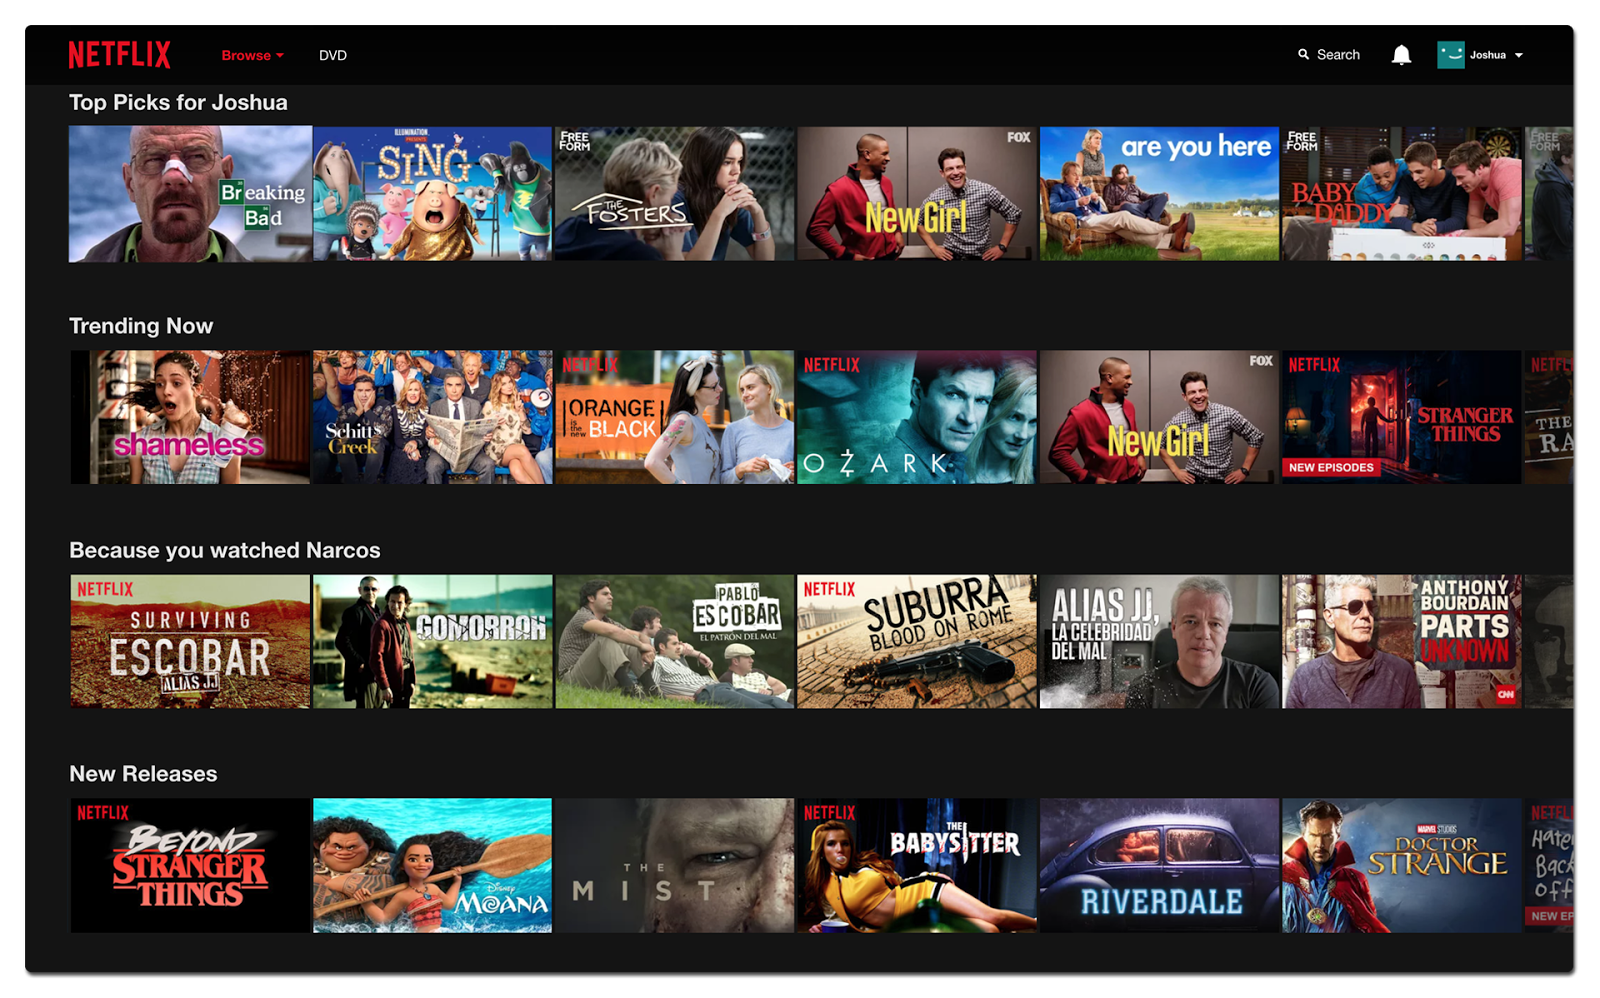

In [ ]:
Image("netflix.png")

# Table of contents:


<a id="section-one"></a>
# Import libraries and datasets

In [2]:
!pip install surprise

     |████████████████████████████████| 11.8MB 347kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1646970 sha256=617f20c46392673be0980f660229a6545ce332f6b651370c21e728c124d0c3d2
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [13]:
# Import Standard libraries
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Style
import wordcloud
%matplotlib inline
sns.set_style("white")
import wordcloud as wc
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from surprise.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise.model_selection import GridSearchCV, RandomizedSearchCV

# Model building
import surprise
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from surprise import (Reader, Dataset, SVD, SVDpp, SlopeOne,
                      NMF,NormalPredictor, KNNBaseline, KNNBasic,
                      KNNWithMeans, KNNWithZScore, BaselineOnly,
                      CoClustering)

# Model evaluation
from surprise import accuracy
from surprise.accuracy import rmse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import make_scorer,mean_squared_error



In [14]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
train = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/train.csv")
genome_scores = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/genome_scores.csv")
imdb_data = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/imdb_data.csv")
movies = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/movies.csv")
tags = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/tags.csv")
sample = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/sample_submission.csv")
links = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/links.csv")
genome_tags = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/genome_tags.csv")
test = pd.read_csv("/content/drive/My Drive/Unsupervised/edsa-recommender-system-predict.zip (Unzipped Files)/test.csv")

In [ ]:
# Import dataset 
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
links = pd.read_csv('links.csv')
train = pd.read_csv('train.csv')
movies = pd.read_csv('movies.csv')
imdb_data = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
sample = pd.read_csv('sample_submission.csv')
genome_scores = pd.read_csv('genome_scores.csv')


<a id="section-two"></a>
# Looking at the raw data

In [ ]:
# Taking general look at all the datasets

print(train.shape)
print(test.shape)

display(test.head())
display(train.head())
display(genome_tags.head())
display(genome_scores.head())
display(links.head())
display(movies.head())
display(imdb_data.head())
display(sample.head())


(10000038, 4)
(5000019, 2)


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


<a id="section-three"></a>
## Explatotary Data Analysis

In [ ]:
# Merge train and movies data set
train_merged = pd.merge(train, movies, how="inner", on=['movieId'])
test_merged = pd.merge(test, movies, how="inner", on=['movieId'])


In [ ]:
# Checking missing values
train_merged.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [ ]:
# Create a column showing the year the movie was released
years=[]

for title in train_merged['title']:
    year_subset=title[-5:-1]
    try:years.append(int(year_subset))
    except: years.append(9999)
train_merged['movie_year']= years


In [ ]:
# Check the first five rows of the train dataset 
train_merged.head(5)


,userId,movieId,rating,timestamp,title,genres,movie_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,2008


In [ ]:
# Convert time format to readable format
train['timestamp'] = train['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
train.head()


,userId,movieId,rating,timestamp
0,5163,57669,4.0,2018
1,106343,5,4.5,2008
2,146790,5459,5.0,2004
3,106362,32296,2.0,2015
4,9041,366,3.0,1996


In [ ]:
# Drop timestamp colomn
train_new= train.drop('timestamp',axis=1)


In [ ]:
# Printing the total dimension of the train dataset
train_new.shape


(10000038, 3)

In [ ]:
# Number of users ,movies and ratings
n_users = train_new.userId.unique().shape[0]
n_items = train_new.movieId.unique().shape[0]
sparsity = round(1.0-len(train_new)/float(n_users*n_items),3)

# Printi
print("Total number of Users: {}".format(n_users))
print("Total number of Movies: {}".format(n_items))
print("Total number of ratings provided:  {}".format(len(train_new)))
print("Total number ratings provided & not specified: {}".format(n_items*n_users))
print ("Rating Matrix is {}% sparse".format(sparsity*100))


Total number of Users: 162541
Total number of Movies: 48213
Total number of ratings provided:  10000038
Total number ratings provided & not specified: 7836589233
Rating Matrix is 99.9% sparse


In [ ]:
# Creating dataframe with movie
year_mean_count= pd.DataFrame(train_merged.groupby('movie_year').count())
year_mean_count.head(3)


,userId,movieId,rating,timestamp,title,genres
movie_year,,,,,,
6,2,2,2,2,2,2
1874,2,2,2,2,2,2
1878,6,6,6,6,6,6


In [ ]:
# Count movie titles by year
count_of_years=train_merged.groupby('title')['movie_year'].count().sort_values(ascending=False).head()


In [ ]:
# Display movie title by year
count_of_years


title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: movie_year, dtype: int64

In [ ]:
# Total ratings by title and mean ratings
df_n_ratings = pd.DataFrame(train_merged.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(train_merged.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(10)


,mean ratings,total ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014
Star Wars: Episode IV - A New Hope (1977),4.111811,27560
Jurassic Park (1993),3.684634,25518
Schindler's List (1993),4.247625,24004
Braveheart (1995),3.994119,23722


In [ ]:
# Top 10 movies with higher rating
df_n_ratings.sort_values('mean ratings', ascending=False).head(10)


,mean ratings,total ratings
title,,
Which Way Home (2009),5.0,1
Kaakha Kaakha (2003),5.0,1
Not Quite Human II (1989),5.0,1
Selling Isobel (2018),5.0,1
Sehar (2005),5.0,1
The Enchanted Sedan Chair (1905),5.0,1
K.G.F: Chapter 1 (2018),5.0,1
Hard Cash (2002),5.0,1
Everyone's Going to Die (2013),5.0,1


In [ ]:
# Printing total users rated movies with 5.0
print('Total no of users that gave rating of 5.0 : ', 
      len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')

# Printing total individual users that gave 5.0 rating
print('Total no of Individual users that gave rating of 5.0 : ', 
      len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) 
                           & (df_n_ratings['total ratings'] == 1)]))


Total no of users that gave rating of 5.0 :  964 

Total no of Individual users that gave rating of 5.0 :  935


In [ ]:
# Checking if the user has rated the same movie twice, in that case we just take max of them
ratings_df = train_new.groupby(['userId','movieId']).aggregate(np.max)


In [ ]:
# Display user rated movies
ratings_df.head()


rating
userId movieId        
1      296         5.0
       665         5.0
       899         3.5
       1175        3.5
       1217        3.5

In [ ]:
# 
null_columns=movies.columns[movies.isnull().any()]
movies[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
train_new.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [ ]:
# Couting no of unique users and movies
len(train_new.userId.unique()), len(train_new.movieId.unique())


(162541, 48213)

In [ ]:
# List of genres available

genre_list = ""
for index,row in movies.iterrows():
        genre_list += row.genres + "|"

#split the string into a list of values
genre_list_split = genre_list.split('|')

#de-duplicate values
new_list = list(set(genre_list_split))

#remove the value that is blank
new_list.remove('')

#inspect list of genres
new_list


['Mystery',
 'Crime',
 'Children',
 'Romance',
 'Western',
 'Action',
 'Thriller',
 'Comedy',
 '(no genres listed)',
 'Documentary',
 'Adventure',
 'Animation',
 'Drama',
 'Fantasy',
 'Sci-Fi',
 'Film-Noir',
 'Horror',
 'Musical',
 'War',
 'IMAX']

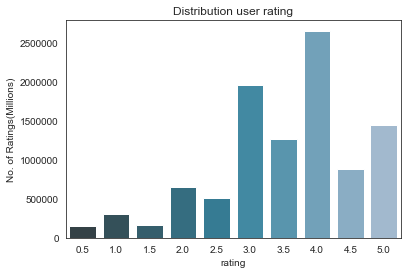

In [ ]:
# 
fig, ax = plt.subplots()
sns.countplot(train_new.rating,palette="PuBuGn_d")
ax.set_ylabel('No. of Ratings(Millions)')
plt.title('Distribution user rating')
plt.show()

In [ ]:
#Getting the percentage count of each rating value 
count_ratings = train_new.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)


Text(0.5, 1.0, 'Total percentage')

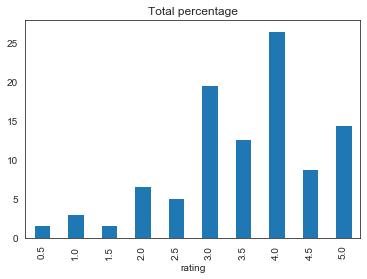

In [ ]:
#Visualising the percentage total for each rating
count_ratings['perc_total'].plot.bar()
plt.title('Total percentage')


In [ ]:
# Display 10 movies with highest ratings
train_merged[['title','genres','rating']].sort_values('rating', ascending=False).head(10)


,title,genres,rating
3893030,Full Metal Jacket (1987),Drama|War,5.0
1180663,When Harry Met Sally... (1989),Comedy|Romance,5.0
1180676,When Harry Met Sally... (1989),Comedy|Romance,5.0
1180675,When Harry Met Sally... (1989),Comedy|Romance,5.0
2672717,Annie Hall (1977),Comedy|Romance,5.0
2672720,Annie Hall (1977),Comedy|Romance,5.0
2672721,Annie Hall (1977),Comedy|Romance,5.0
1180671,When Harry Met Sally... (1989),Comedy|Romance,5.0
1180670,When Harry Met Sally... (1989),Comedy|Romance,5.0
2672724,Annie Hall (1977),Comedy|Romance,5.0


In [ ]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1

# Convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]


[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

In [ ]:
# Showing movieId
len(set(imdb_data.movieId))


27278

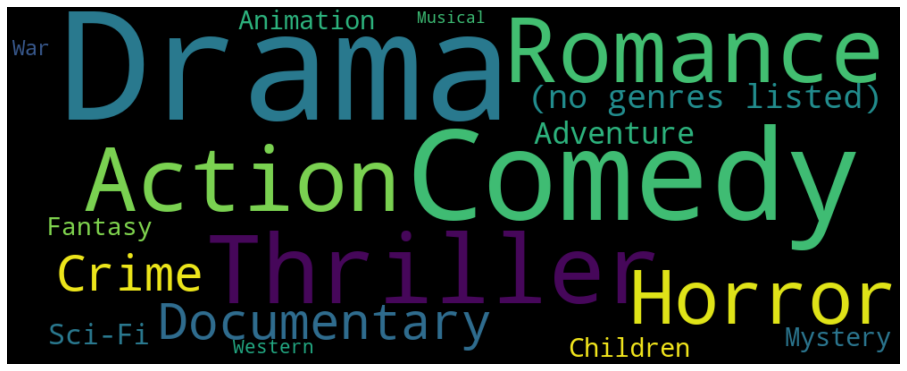

In [ ]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


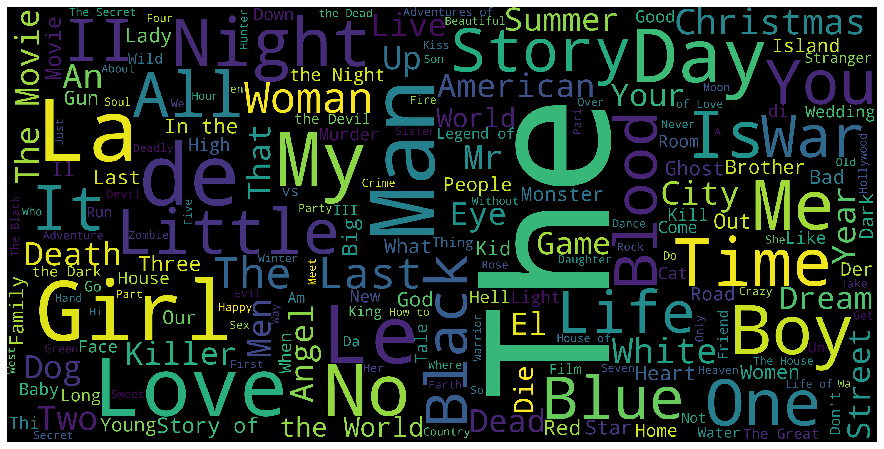

In [ ]:
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


## Collaborative Filtering

In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective). The algorithm has the ability to do feature learning on its own, which means that it can start to learn for itself what features to use.

CF can be divided into Memory-Based Collaborative Filtering and Model-Based Collaborative filtering.

Here, we will implement Model-Based CF by using singular value decomposition (SVD)


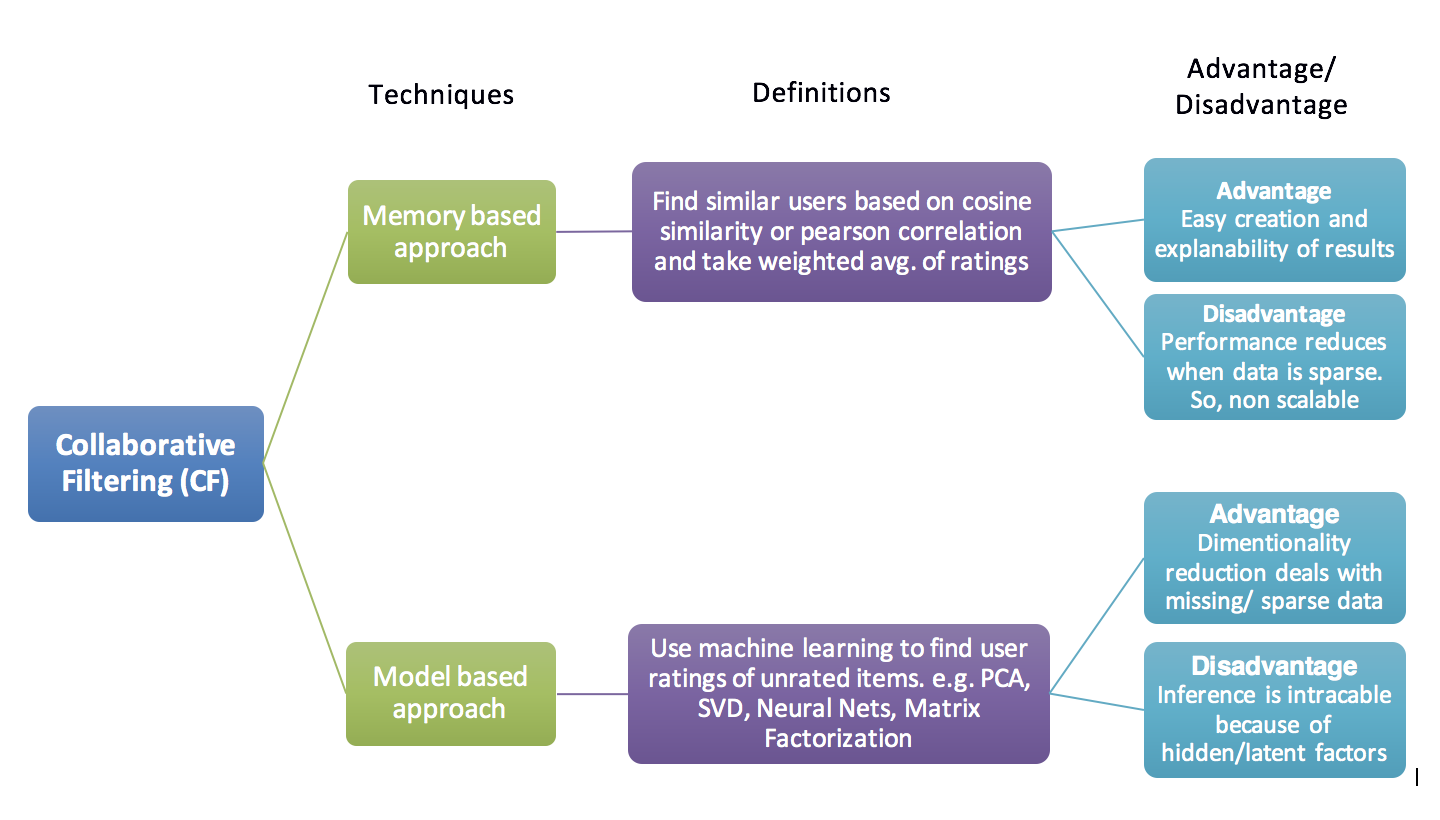

In [ ]:
Image("collaborative.png")

Theory


Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is Root Mean Squared Error (RMSE). I will use the mean_square_error (MSE) function from sklearn, where the RMSE is just the square root of MSE.

$$\mathit{RMSE} =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}$$

In [ ]:
# Selecting a subset of the merge trained data
sub_set= train_new[0:10000038]


In [ ]:
# Low an higher ratings for the movies
lower_rating= sub_set['rating'].min()
upper_rating=sub_set['rating'].max()


In [ ]:
# Print ratings range
print("Review range: {0} to {1}".format(lower_rating, upper_rating))


Review range: 0.5 to 5.0


In [ ]:
reader = Reader(rating_scale=(0.5,5.0))

In [ ]:
data= Dataset.load_from_df(sub_set,reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)

A well-known matrix factorization method is Singular value decomposition (SVD). At a high level, SVD is an algorithm that decomposes a matrix $A$ into the best lower rank (i.e. smaller/simpler) approximation of the original matrix $A$. Mathematically, it decomposes A into a two unitary matrices and a diagonal matrix:

In [ ]:
algo=SVD(n_epochs=40,lr_all=0.003,reg_all=0.03,random_state=14,verbose=True)

In [ ]:
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39


RMSE of training of model is a metric which measure how much the signal and the noise is explained by the model. I noticed that my RMSE is quite big. I suppose I might have overfitted the training data.

In [ ]:
algo.fit(trainset)

In [ ]:
test_pred= algo.test(testset)

In [ ]:
users,test=list(test.userId),list(test.movieId)

In [ ]:
new_list=zip(users,test)

In [ ]:
prediction= [algo.predict(x,y)[3] for x,y in new_list]

In [ ]:
submission = pd.DataFrame({"Id":sample.Id,"rating": prediction})

In [ ]:
submission.to_csv("submission.csv", index=False)

In [ ]:
new_sub.rename(columns={'pred_ratings':'rating'},inplace=True)

In [ ]:
sample['rating'] = prediction

In [ ]:
sample.to_csv('submission.csv',index=False)

## Content Based

In [7]:
Image('content.gif')

Content here refers to the content or attributes of the products or item of interest. So, the idea in content-based filtering is to tag products using certain keywords, understand what the user likes, look up those keywords in the database and recommend different products with the same attributes.

However in this notebook what we do is to try and figure if a certain user is going to like a certain movie, and whether or not they like it is gauged on the rating the would give the movie from 0 (dislike the movie) to 5 (highly liking the movie) based on movie meta-data data like cast, director and keywords. 

So We altermately want to predict rating of a movie based on its contents, basically appraoching this like we would a classification problem. With that in mind the idea we had is to extract all meta-data from the dataset and and merge everything to to data-frames, one containing `movieId`, `megered meta-data` and `weighted-rating` for each movie in the the train dataset and the other `movieId` and `merged meta-data` for each movie in the test dataset.

### Preprocessing

Before going into the preprocessing lets do a mini EDA.

In [16]:
# List of movies in test dataset
test_movies = list(set(test.movieId))

# List of movies in movies dataset
movie_movies = list(movies.movieId)

# List of movies in train dataset
train_movies = list(set(train.movieId))

# List of movies in tag dataset
tag_movies = list(set(tags.movieId))

# Number of movies in test dataset in tag dataset
test_in_tags = []
for i in test_movies:
    if i in tag_movies:
        test_in_tags.append(True)
    else:
        test_in_tags.append(False)

display(f'test_in_tags: {sum(test_in_tags)}')

# Number of movies in train dataset in tag dataset
train_in_tags = []
for i in train_movies:
    if i in tag_movies:
        train_in_tags.append(True)
    else:
        train_in_tags.append(False)

display(f'train_in_tags: {sum(train_in_tags)}')

# Number of movies in test dataset in movies dataset
test_in_movies = []
for i in test_movies:
    if i in movie_movies:
        test_in_movies.append(True)
    else:
        test_in_movies.append(False)

display(f'test_in_movies: {sum(test_in_movies)}')

# Number of movies in test dataset in train dataset
test_in_train = [] 
for i in test_movies:
    if i in train_movies:
        test_in_train.append(True)
    else:
        test_in_train.append(False)

display(f'test_in_train:{sum(test_in_train)}')

# Number of movies in train dataset in movies dataset
train_in_movies = []
for i in train_movies:
    if i in movie_movies:
        train_in_movies.append(True)
    else:
        train_in_movies.append(False)

display(f'train_in_movies: {sum(train_in_movies)}')

'test_in_tags: 31987'

'train_in_tags: 36724'

'test_in_movies: 39643'

'test_in_train:34599'

'train_in_movies: 48213'

In [17]:
# Merging all tags of each movie into a sentence like string
tag4all = []
for i in tag_movies:
    tag4all.append(' '.join(tags[tags.movieId==i].tag.fillna('').apply(
    lambda x: x.lower().replace(' ',''))))

pd.Series(tag4all)

0        owned imdbtop250 pixar pixar timetravel childr...
1        robinwilliams timetravel fantasy basedonchildr...
2        funny bestfriend duringcreditsstinger fishing ...
3        basedonnovelorbook chickflick divorce interrac...
4        aging baby confidence contraception daughter g...
                               ...                        
45246                       christmas gift santaclaus snow
45247    bestfriend coffeeshop cologne concert egomania...
45248                            dystopia post-apocalyptic
45249    manhattan,newyorkcity friends newyorkcity rela...
45250    adventure animation barbarians comedy crudehum...
Length: 45251, dtype: object

In [18]:
# Data-frame of merged tags
tag_df = pd.DataFrame({'movieId':tag_movies,
                       'tag_mash':tag4all},
                      columns=['movieId','tag_mash'])

tag_df.head()

,movieId,tag_mash
0,1,owned imdbtop250 pixar pixar timetravel childr...
1,2,robinwilliams timetravel fantasy basedonchildr...
2,3,funny bestfriend duringcreditsstinger fishing ...
3,4,basedonnovelorbook chickflick divorce interrac...
4,5,aging baby confidence contraception daughter g...


In [ ]:
def unique_words(s):

  """
  Takes in a string and and returns a string.

  Parameters:
    s (str): A string of words or a sentence.

  Returns:
    (str): A string of unique words.
    
  """
  unique_list = []
  l = s.split()
  [unique_list.append(x) for x in l if x not in unique_list]
  return ' '.join(unique_list)

In [ ]:
tag_df.tag_mash = tag_df.tag_mash.apply(lambda x: unique_words(x))

tag_df.head()

In [ ]:
def imdb_processor(df):

    """
    Takes in the IMDB data as a pandas dataframe and merges the cast,
    director and plot keywords for each movie into one string.

    Parameters:
      df (pd.DataFrame): IMDB dataframe.

    Returns:
      (pd.DataFrame): IMDB dataframe.

    """
    copy = df.copy()

    # Cleaning data, lower casing everything and removing spaces between acotor names.
    # This is because we want John Lee and John Wick to not be treated as the same person.
     
    copy.title_cast = copy.title_cast.fillna('').apply(
      lambda x: ' '.join(x.lower().replace(' ','').split('|')))
    copy.director = copy.director.fillna('').apply(
      lambda x:x.lower().replace(' ',''))
    copy.plot_keywords = copy.plot_keywords.fillna('').apply(
      lambda x: ' '.join(x.lower().replace(' ','').split('|')))
  
    merge_list = []
    for i in copy.index:
        merge_list.append(
            copy.title_cast[i]+' '+copy.director[i]+' '+copy.plot_keywords[i])
        
    return pd.DataFrame({'movieId':copy.movieId,
                         'meta_mash':pd.Series(merge_list)},
                        columns=['movieId','meta_mash'])
   

In [ ]:
new_imdb = imdb_processor(imdb_data)

In [ ]:
new_imdb.head()

In [ ]:
# Merging all ratings of each movie into a sentence like string
rating4all = []
for i in train_movies:
    rating4all.append(list(train[train.movieId==i].rating))

pd.Series(rating4all)

In [ ]:
# Data-frame of merge of ratings.
new_train = pd.DataFrame({'movieId':train_movies,
                           'rating_mash':rating4all},
                          columns=['movieId','rating_mash'])

In [ ]:
# Calculating number of votes.
new_train['votes'] = new_train.rating_mash.apply(lambda x: len(x))

# Calculating average rating for each movie
new_train['avg_rating'] = new_train.rating_mash.apply(
    lambda x: round(sum(x)/len(x),1))

new_train.head()

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 4.5 average rating and only 3 votes cannot be considered better than the movie with 3.5 as average rating but 40 votes.
 So, we'll be using IMDB's weighted rating (wr) which is given as :-

$Weighted$ $Rating$ ($WR$) $=$ $(v/v+m)R+(m/m+v)C$

* $v$ - _is the number of votes for the movie_
* $m$ - _is the minimum votes required to be listed in the chart_
* $R$ - _R is the average rating of the movie_
* $C$ - _is the mean vote across the whole report_



In [ ]:
# We chose a cut off threshold of 10 minimum votes because we want
# the movie to have substantial ratings but we lso do not want to
# cut off a huge number of our training data
m = 10

C = round(new_train.avg_rating.mean(),1)
print(C)

In [ ]:
q_train = new_train[new_train.votes > m]

In [ ]:
def weighted_rating(df, m=m, C=C):

    """
    Calculates weighted rating based on IMDB formula.

    Parameters:
      df (pd.DataFrame): IMDB dataframe.
      m (int): minimum votes required to be listed in the chart.
      C (float): mean of all votes.

    Returns:
      (float): weighted ratings .

    """
    x = df.copy()
    v = x['votes']
    R = x['avg_rating']
    return round((v/(v+m) * R) + (m/(m+v) * C),1)

In [ ]:
q_train['w_rating'] = q_train.apply(weighted_rating, axis=1)
final_train = q_train.drop(columns=['rating_mash','votes','avg_rating'])
final_test = pd.Series(test_movies).to_frame('movieId')

In [ ]:
def content_processor(df1,df2,df3):

    """
    Merges all meta-data/information of each movie into a string for each movie from different dataframes  .

    Parameters:
      df (pd.DataFrame): IMDB dataframe.
      m (int): minimum votes required to be listed in the chart.
      C (float): mean of all votes.

    Returns:
      (float): weighted ratings .

    """
    copy1 = df1.copy()
    copy2 = df2.copy()
    copy3 = df3.copy()

    copy1.genres = copy1.genres.apply(lambda x:" ".join(x.lower().split("|")))

    # Meging all meta-data to both train and test dataset
    train_gen = pd.merge(final_train, copy1, on='movieId',how='left').drop(
      columns='title')
    test_gen = pd.merge(final_test, copy1, on='movieId',how='left').drop(
      columns='title')
  
    train_gen = pd.merge(train_gen, copy2, on='movieId',how='left').fillna('')
    test_gen = pd.merge(test_gen, copy2, on='movieId',how='left').fillna('')

    train_gen = pd.merge(train_gen, copy3, on='movieId',how='left').fillna('')
    test_gen = pd.merge(test_gen, copy3, on='movieId',how='left').fillna('')

    mash_list1 = []
    for i in train_gen.index:
        mash_list1.append(
            train_gen.genres[i]+' '+train_gen.tag_mash[i]+' '+train_gen.meta_mash[i])

    train_gen['merge_of_all'] = pd.Series(mash_list1)

    mash_list2 = []
    for i in test_gen.index:
        mash_list2.append(
            test_gen.genres[i]+' '+test_gen.tag_mash[i]+' '+test_gen.meta_mash[i])

    test_gen['merge_of_all'] = pd.Series(mash_list2)
    
    return train_gen, test_gen

In [ ]:
train_gen,test_gen = content_processor(movies,tag_df,new_imdb)

In [ ]:
Train = train_gen.drop(columns=['genres','tag_mash','meta_mash'])
Test = test_gen.drop(columns=['genres','tag_mash','meta_mash'])

In [ ]:
def rating_processor(num):

    """
    Processes weighted ratings to be consistent with
    IMDB-rating of range 0.5 to 5.0 with a step of 0.5 .

    Parameters:
      num (int): weighted rating of a movie.

    Returns:
      (int): IMDB-rating consistent.

    """
    if num > 4.5:
        return 5.0
    elif num > 4.0 and num <= 4.5:
        return 4.5
    elif num > 3.5 and num <= 4.0:
        return 4.0
    elif num > 3.0 and num <= 3.5:
        return 3.5
    elif num > 2.5 and num <= 3.0:
        return 3.0
    elif num > 2.0 and num <= 2.5:
        return 2.5
    elif num > 1.5 and num <= 2.0:
        return 2.0
    elif num > 1.0 and num <= 1.5:
        return 1.5
    elif num > 0.5 and num <= 1.0:
        return 1.0
    else:
        return 0.5

In [ ]:
Train.w_rating = Train.w_rating.apply(lambda x: rating_processor(x))

In [ ]:
Train.head()

In [ ]:
Test.head()

### Modeling

In [ ]:
vec = TfidfVectorizer(stop_words='english',min_df=3)
le = LabelEncoder()

In [ ]:
X = vec.fit_transform(Train.merge_of_all)
y = le.fit_transform(Train.w_rating)
X_test = vec.transform(Test.merge_of_all)

In [ ]:
X

In [ ]:
y

In [ ]:
# Evaluation metric
def rmse(y_true,y_pred):
  """
  Calculates root mean squared error from true and predicted response variables

  """
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [ ]:
rmse_ = make_scorer(rmse)

In [ ]:
# Instantiate various models 
lsvc = LinearSVC()
ABC = AdaBoostClassifier()
KNN = KNeighborsClassifier()
EXTC = ExtraTreesClassifier()
GBC = GradientBoostingClassifier()

In [ ]:
print('Cross validation for LinearSVC :')
print(cross_val_score(lsvc,X,y,cv=5,scoring=rmse_),'\n')
print('Cross validation for AdaBoostClassifier :')
print(cross_val_score(ABC,X,y,cv=5,scoring=rmse_)'\n')
print('Cross validation for KNeighboursClassifier')
print(cross_val_score(KNN,X,y,cv=5,scoring=rmse_)'\n')
print('Cross validation Extra trees :')
print(cross_val_score(EXTC,X,y,cv=5,scoring=rmse_)'\n')
print('Cross validation Gradient boosting :')
print(cross_val_score(GBC,X,y,cv=5,scoring=rmse_))

Choosing the model with the best validation score and hyperparameter tunning.

In [ ]:
param_distributions = {'C':np.arange(1, 50, 2).tolist(),
                       'loss':['squared_hinge','hinge']}

In [ ]:
RS = RandomizedSearchCV(lsvc,param_distributions=param_distributions,
                        n_iter=10,cv=5)

In [ ]:
RS.fit(X,y)

In [ ]:
RS.best_params_

In [ ]:
RS.best_score_

In [ ]:
RS.best_estimator_.fit(X, y)

In [ ]:
y_pred = RS.best_estimator_.predict(X_test)

In [ ]:
Test['ratings'] = pd.Series(le.inverse_transform(y_pred))

In [ ]:
Test.head()

In [ ]:
the_sub = pd.merge(test, Test, on='movieId',how='left')

In [ ]:
the_sub.head()

In [ ]:
sub = pd.concat([samplen ,the_sub], axis=1)

In [ ]:
sub.drop(columns=['userId','movieId','merge_of_all','rating'],
         axis=1,inplace=True)

In [ ]:
sub.rename(columns={'ratings':'rating'},inplace=True)

In [ ]:
sub.head()

In [ ]:
sub.to_csv('content_0.2.csv',index=False)